<a href="https://colab.research.google.com/github/Solsmi/challenge_telecomx_latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diccionario**
- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: edad de cliente igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

#📌 Extracción

In [172]:
import requests
import pandas as pd

In [173]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [174]:
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


##Inspeccionar Tipos de Datos

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

##Inspeccionar Valores Nulos

In [176]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


## Analizar Valores Únicos en Columnas Tipo *Object*

---



Para las columnas de tipo 'object', examinar los valores únicos para comprender las categorías existentes e identificar posibles inconsistencias o valores inesperados.


In [177]:
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    print(f"Column: {col}")
    value_counts = df[col].value_counts()
    print(value_counts)

    # destacar valores vacios o espacios en blanco
    empty_values_count = df[col].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
    if empty_values_count > 0:
        print(f"\033[1m    (Observacion: Se encontraron {empty_values_count} valores vacíos o de solo espacios en blanco)\033[0m") # ANSI escape codes for bold text

    print("\n" + "-" * 30 + "\n")

Column: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

------------------------------

Column: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
    (Observacion: Se encontraron 224 valores vacíos o de solo espacios en blanco)

------------------------------

Column: customer.gender
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

------------------------------

Column: customer.Partner
customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

------------------------------

Column: customer.Dependents
customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64

------------------------------

Column: phone.PhoneService
phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

------------------------------

Column: ph

El análisis de los valores únicos para las columnas de tipo 'object' ha revelado algunas inconsistencias:

- **Churn**: Además de 'No' y 'Yes', se encontraron 224 entradas con un valor vacío `''`. Esto podría indicar datos faltantes o un problema en la recolección de datos que necesita ser abordado.
- **account.Charges.Total**: Se identificaron 11 entradas con un valor vacío `''`. Dado que esta columna debería ser numérica (total de cargos), estos valores vacíos impedirán el análisis numérico y deben ser tratados. También, la columna `account.Charges.Total` se identificó como tipo `object` en el `df.info()`, lo que sugiere que los valores vacíos podrían estar causando que no se convierta a un tipo numérico adecuado. Esto requerirá una limpieza y conversión de tipo de datos.

##Valores vacíos o en blanco

In [178]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#🔧 Transformación

##Eliminar valores vacíos de Churn

In [179]:
df = df[df['Churn'] != '']
df.reset_index(drop=True, inplace=True)


In [180]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)
print(f"\nSuma Total: {churn_counts.sum()}")

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Suma Total: 7043


##Eliminar cadenas vacías y espacios en blanco de Charges.Total

In [181]:
df = df[df['account.Charges.Total'] != '']
df = df[df['account.Charges.Total'].str.strip() != '']
df.reset_index(drop=True, inplace=True)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'])

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   objec

##Estandarización español

In [183]:
columnas = {    # Diccionario con los nuevos nombres de las columnas.
    'customerID': 'id_cliente',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargo_mensual',
    'account.Charges.Total': 'cargo_total',

}
df = df.rename(columns= columnas)
df

,id_cliente,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [184]:
df['Churn'] = df['Churn'].replace({'Yes': 'Sí'})
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['posee_pareja'] = df['posee_pareja'].replace({'Yes': 'Sí'})
df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': 'Sí'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': 'Sí'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'Fiber optic': 'Fibra óptica'})
df['seguridad_online'] = df['seguridad_online'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['backup_online'] = df['backup_online'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['proteccion_dispositivo'] = df['proteccion_dispositivo'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['soporte_tecnico'] = df['soporte_tecnico'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['streaming_tv'] = df['streaming_tv'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['streaming_peliculas'] = df['streaming_peliculas'].replace({'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df['factura_digital'] = df['factura_digital'].replace({'Yes': 'Sí'})
df['metodo_pago'] = df['metodo_pago'].replace({'Mailed check': 'Cheque por correo', 'Electronic check': 'Cheque electrónico', 'Bank transfer (automatic)': 'Transferencia bancaria (automática)', 'Credit card (automatic)': 'Tarjeta de crédito (automática)'})

In [185]:
pd.set_option('display.max_columns', None)  #ver todas las columnas

In [186]:
df.head()

,id_cliente,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,No,Sí,No,Sí,Sí,No,Anual,Sí,Cheque por correo,65.6,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Sí,Mensual,No,Cheque por correo,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,No,No,Sí,No,No,No,Mensual,Sí,Cheque electrónico,73.9,280.85
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,No,Sí,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,No,No,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,83.9,267.40


In [187]:
df['cuentas_diarias'] = df['cargo_mensual'] / 30
df.head()

,id_cliente,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,No,Sí,No,Sí,Sí,No,Anual,Sí,Cheque por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Sí,Mensual,No,Cheque por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,No,No,Sí,No,No,No,Mensual,Sí,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,No,Sí,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,No,No,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,83.9,267.40,2.796667


EDADES

In [188]:
print(df['tiene +60'].unique())

[0 1]


In [189]:
df['tiene +60'].value_counts()  #mayoría de clientes tienen <60 años

,count
tiene +60,
0,5890
1,1142


#📊 Carga y análisis

##Análisis descriptivo

In [190]:
df.describe()

,tiene +60,tiempo_contrato,cargo_mensual,cargo_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


##Distribución de evasión

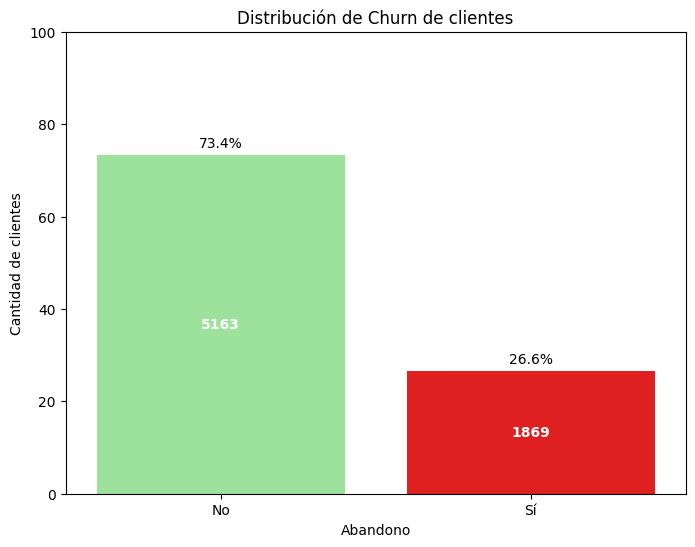

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_percentages = df['Churn'].value_counts(normalize=True) * 100
churn_counts_abs = df['Churn'].value_counts()

color_map = {'No': 'lightgreen', 'Sí': 'red'}

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_percentages.index, y=churn_percentages.values, hue=churn_percentages.index, palette=color_map, legend=False)
plt.title('Distribución de Churn de clientes')
plt.xlabel('Abandono')
plt.ylabel('Cantidad de clientes')
plt.ylim(0, 100)

for index, percentage_value in enumerate(churn_percentages.values):
    # Porcentaje
    plt.text(index, percentage_value + 1, f'{percentage_value:.1f}%', ha='center', va='bottom')
    # Valor absoluto de churn
    abs_value = churn_counts_abs.iloc[index]
    plt.text(index, percentage_value / 2, f'{abs_value}', ha='center', va='center', color='white', fontweight='bold')

plt.savefig('distribucion_churn.png') # Guarda el gráfico en el directorio temporal de Colab
plt.show()

In [192]:
!pip install -U kaleido==0.2.1

In [193]:
import plotly.express as px   # a mayor antigüedad de contrato, menor abandono de clientes

fig = px.histogram(df, x='tiempo_contrato', text_auto=True, color='Churn', barmode='group')

fig.write_image("distribucion_tiempo_contrato_1.png") # Guarda el gráfico en el directorio temporal de Colab
fig.show()

## Análisis de Churn por tipo de columnas
Identificar todas las columnas en el DataFrame df que podrían influir en el Churn, excluyendo id_cliente y el propio Churn. Separar las columnas en categóricas y numéricas para un análisis adecuado.


In [194]:
columnas_categoricas = []
columnas_numericas = []

for col in df.columns:
    if col not in ['id_cliente', 'Churn']:
        if df[col].dtype == 'object':
            columnas_categoricas.append(col)
        elif df[col].dtype in ['int64', 'float64']:
            columnas_numericas.append(col)

print("Columnas Categóricas:", columnas_categoricas)
print("\nColumnas Numéricas:", columnas_numericas)

Columnas Categóricas: ['genero', 'posee_pareja', 'posee_dependientes', 'servicio_telefono', 'multiples_lineas', 'tipo_internet', 'seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'factura_digital', 'metodo_pago']

Columnas Numéricas: ['tiene +60', 'tiempo_contrato', 'cargo_mensual', 'cargo_total', 'cuentas_diarias']


### Análisis de variables categóricas vs. Churn

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Definir el orden de tipo de contrato de menor a mayor plazo
orden_contratos = ['Mensual', 'Anual', 'Bienal']

for col in columnas_categoricas:
    print(f"--- Análisis para la columna: {col} ---")

    # Calcular las tasas de Churn para cada categoría
    churn_por_categoria = df.groupby(col)['Churn'].value_counts(normalize=True).unstack(fill_value=0)
    churn_por_categoria['No Churn (%)'] = churn_por_categoria['No'] * 100
    if 'Sí' in churn_por_categoria.columns:
        churn_por_categoria['Churn (%)'] = churn_por_categoria['Sí'] * 100
    else:
        churn_por_categoria['Churn (%)'] = 0

    print("Tasas de Churn por categoría:")
    print(churn_por_categoria[['No Churn (%)', 'Churn (%)']])
    print("\n")

    # Visualización con px
    if col == 'tipo_contrato':
        fig = px.histogram(df, x=col, color='Churn', barmode='group',
                           title=f'Distribución de Churn por {col.replace("_", " ").title()}',
                           labels={col: col.replace("_", " ").title(), 'Churn': 'Abandono', 'count': 'Número de Clientes'},
                           category_orders={col: orden_contratos},
                           text_auto=True,
                           color_discrete_map=color_map)
    else:
        fig = px.histogram(df, x=col, color='Churn', barmode='group',
                           title=f'Distribución de Churn por {col.replace("_", " ").title()}',
                           labels={col: col.replace("_", " ").title(), 'Churn': 'Abandono', 'count': 'Número de Clientes'},
                           text_auto=True,
                           color_discrete_map=color_map)
    fig.write_image(f"distribucion_de_{col}.png")

    fig.show()

    print("\n" + "="*50 + "\n")

--- Análisis para la columna: genero ---
Tasas de Churn por categoría:
Churn      No Churn (%)  Churn (%)
genero                            
Femenino      73.040482  26.959518
Masculino     73.795435  26.204565






--- Análisis para la columna: posee_pareja ---
Tasas de Churn por categoría:
Churn         No Churn (%)  Churn (%)
posee_pareja                         
No               67.023908  32.976092
Sí               80.282935  19.717065






--- Análisis para la columna: posee_dependientes ---
Tasas de Churn por categoría:
Churn               No Churn (%)  Churn (%)
posee_dependientes                         
No                     68.720860  31.279140
Sí                     84.468795  15.531205






--- Análisis para la columna: servicio_telefono ---
Tasas de Churn por categoría:
Churn              No Churn (%)  Churn (%)
servicio_telefono                         
No                    75.000000  25.000000
Sí                    73.252519  26.747481






--- Análisis para la columna: multiples_lineas ---
Tasas de Churn por categoría:
Churn                     No Churn (%)  Churn (%)
multiples_lineas                                 
No                           74.918759  25.081241
Sin servicio de teléfono     75.000000  25.000000
Sí                           71.351534  28.648466






--- Análisis para la columna: tipo_internet ---
Tasas de Churn por categoría:
Churn          No Churn (%)  Churn (%)
tipo_internet                         
DSL               81.001656  18.998344
Fibra óptica      58.107235  41.892765
No                92.565789   7.434211






--- Análisis para la columna: seguridad_online ---
Tasas de Churn por categoría:
Churn                     No Churn (%)  Churn (%)
seguridad_online                                 
No                           58.221333  41.778667
Sin servicio de internet     92.565789   7.434211
Sí                           85.359801  14.640199






--- Análisis para la columna: backup_online ---
Tasas de Churn por categoría:
Churn                     No Churn (%)  Churn (%)
backup_online                                    
No                           60.058309  39.941691
Sin servicio de internet     92.565789   7.434211
Sí                           78.432990  21.567010






--- Análisis para la columna: proteccion_dispositivo ---
Tasas de Churn por categoría:
Churn                     No Churn (%)  Churn (%)
proteccion_dispositivo                           
No                           60.859729  39.140271
Sin servicio de internet     92.565789   7.434211
Sí                           77.460711  22.539289






--- Análisis para la columna: soporte_tecnico ---
Tasas de Churn por categoría:
Churn                     No Churn (%)  Churn (%)
soporte_tecnico                                  
No                           58.352535  41.647465
Sin servicio de internet     92.565789   7.434211
Sí                           84.803922  15.196078






--- Análisis para la columna: streaming_tv ---
Tasas de Churn por categoría:
Churn                     No Churn (%)  Churn (%)
streaming_tv                                     
No                           66.464934  33.535066
Sin servicio de internet     92.565789   7.434211
Sí                           69.885313  30.114687






--- Análisis para la columna: streaming_peliculas ---
Tasas de Churn por categoría:
Churn                     No Churn (%)  Churn (%)
streaming_peliculas                              
No                           66.271125  33.728875
Sin servicio de internet     92.565789   7.434211
Sí                           70.047602  29.952398






--- Análisis para la columna: tipo_contrato ---
Tasas de Churn por categoría:
Churn          No Churn (%)  Churn (%)
tipo_contrato                         
Anual             88.722826  11.277174
Bienal            97.151335   2.848665
Mensual           57.290323  42.709677






--- Análisis para la columna: factura_digital ---
Tasas de Churn por categoría:
Churn            No Churn (%)  Churn (%)
factura_digital                         
No                  83.624302  16.375698
Sí                  66.410749  33.589251






--- Análisis para la columna: metodo_pago ---
Tasas de Churn por categoría:
Churn                                No Churn (%)  Churn (%)
metodo_pago                                                 
Cheque electrónico                      54.714588  45.285412
Cheque por correo                       80.798005  19.201995
Tarjeta de crédito (automática)         84.746877  15.253123
Transferencia bancaria (automática)     83.268482  16.731518




### Análisis de variables numéricas vs. Churn

Churn por edad: Tiene +60 |  Cálculo de tasa de Churn

In [196]:
churn_por_edad = df.groupby('tiene +60')['Churn'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Renombrar las columnas para mayor claridad
churn_por_edad = churn_por_edad.rename(columns={'No': 'No Churn (%)', 'Sí': 'Churn (%)'})

# Mapear los valores 0 y 1 de 'tiene +60' a 'No' y 'Sí' para el índice
churn_por_edad.index = churn_por_edad.index.map({0: 'No', 1: 'Sí'})

print("Tasa de Churn por Edad (tiene +60):")
display(churn_por_edad)

Tasa de Churn por Edad (tiene +60):


Churn,No Churn (%),Churn (%)
tiene +60,,
No,76.349745,23.650255
Sí,58.318739,41.681261


Estos datos revelan que los clientes que Sí tienen +60 años presentan una tasa de abandono significativamente más alta (41.68%) en comparación con los clientes que No tienen +60 años (23.65%). Esto sugiere que la edad de los clientes es un factor importante a considerar.

Distribución de Churn en variables numéricas

In [197]:
import plotly.express as px
import pandas as pd

# Redefinir columnas categoricas y numericas
columnas_categoricas = []
columnas_numericas = []

for col in df.columns:
    if col not in ['id_cliente', 'Churn']:
        if df[col].dtype == 'object':
            columnas_categoricas.append(col)
        elif df[col].dtype in ['int64', 'float64']:
            columnas_numericas.append(col)

color_map = {'No': 'lightgreen', 'Sí': 'red'}

# Calcular las tasas de Churn para 'tiene +60' aquí para que sea autocontenido
churn_por_edad_calc = df.groupby('tiene +60')['Churn'].value_counts(normalize=True).unstack(fill_value=0) * 100
churn_por_edad_calc = churn_por_edad_calc.rename(columns={'No': 'No Churn (%)', 'Sí': 'Churn (%)'})
churn_por_edad_calc.index = churn_por_edad_calc.index.map({0: 'No', 1: 'Sí'}) # Mantener 'No' y 'Sí' para mapeo a etiquetas

for col in columnas_numericas:
    print(f"--- Análisis para la columna numérica: {col} ---")
    if col == 'tiene +60':
        temp_df = df.copy()
        temp_df['tiene +60_label'] = temp_df['tiene +60'].map({0: 'No', 1: 'Sí'})

        # Agrupar datos para obtener los conteos
        agg_df = temp_df.groupby(['tiene +60_label', 'Churn']).size().reset_index(name='count')

        # Calcular el total de clientes por grupo de edad para los porcentajes
        total_per_age_group = agg_df.groupby('tiene +60_label')['count'].sum().reset_index(name='total_group_count')
        agg_df = pd.merge(agg_df, total_per_age_group, on='tiene +60_label')

        # Calcular el porcentaje de Churn dentro de cada grupo de edad
        agg_df['percentage'] = (agg_df['count'] / agg_df['total_group_count']) * 100

        # Crear el gráfico de barras donde el eje Y es el CONTEO
        fig = px.bar(agg_df, x='tiene +60_label', y='count', color='Churn', barmode='group',
                           title='Distribución de Clientes por Edad y Abandono',
                           labels={'tiene +60_label': 'Es mayor de 60 años', 'Churn': 'Abandono', 'y': 'Número de Clientes'},
                           text=agg_df['count'], # Mostrar el conteo absoluto dentro de las barras
                           color_discrete_map=color_map)

        # Estilizar el texto del conteo (dentro de las barras)
        fig.update_traces(textposition='inside',
                          textfont=dict(color='white', size=10, weight='bold'),
                          cliponaxis=False # Asegura que el texto no se recorte en barras pequeñas
                         )

        # Añadir anotaciones para los porcentajes encima de las barras
        # Se asumen offsets para las barras agrupadas para alinear el texto aproximadamente al centro de cada barra.
        # 'No' en 'tiene +60_label' corresponde a índice 0, 'Sí' a índice 1 en un eje categórico.
        x_offsets_per_churn = {'No': -0.2, 'Sí': 0.2} # Offset para barra 'No Churn' y 'Sí Churn' dentro de cada grupo

        for idx, row in agg_df.iterrows():
            category_x_pos = 0 if row['tiene +60_label'] == 'No' else 1
            churn_offset = x_offsets_per_churn[row['Churn']]

            # Calcular la posición X ajustada para la anotación
            x_annotation = category_x_pos + churn_offset

            # Posición Y para la anotación (ligeramente por encima de la barra)
            y_annotation = row['count'] # Ahora se usa el conteo para posicionar la anotación del porcentaje

            fig.add_annotation(
                x=x_annotation,
                y=y_annotation,
                text=f"{row['percentage']:.1f}%", # El porcentaje encima de la barra
                showarrow=False,
                yshift=10, # Desplazamiento vertical hacia arriba
                font=dict(color='black', size=10) # Color negro para los porcentajes
            )

    else:
        fig = px.box(df, y=col, color='Churn',
                     title=f'Distribución de {col.replace("_", " ").title()} por Churn',
                     labels={col: col.replace("_", " ").title(), 'Churn': 'Abandono'},
                     color_discrete_map=color_map)

    fig.write_image(f"distribucion_{col}.png") # Guarda los gráficos en el directorio temporal de Colab
    fig.show()
    print("\n" + "="*50 + "\n")

--- Análisis para la columna numérica: tiene +60 ---




--- Análisis para la columna numérica: tiempo_contrato ---




--- Análisis para la columna numérica: cargo_mensual ---




--- Análisis para la columna numérica: cargo_total ---




--- Análisis para la columna numérica: cuentas_diarias ---


##Otras visualizaciones

------------ **Situación familiar** ------------

In [198]:
import numpy as np

conditions = [
    (df['posee_pareja'] == 'Sí') & (df['posee_dependientes'] == 'Sí'),
    (df['posee_pareja'] == 'Sí') & (df['posee_dependientes'] == 'No'),
    (df['posee_pareja'] == 'No') & (df['posee_dependientes'] == 'Sí'),
    (df['posee_pareja'] == 'No') & (df['posee_dependientes'] == 'No')
]

choices = [
    'Con pareja y dependientes',
    'Con pareja, sin dependientes',
    'Sin pareja, con dependientes',
    'Sin pareja ni dependientes'
]

df['situacion_familiar'] = np.select(conditions, choices, default='Desconocido')
df.head()

,id_cliente,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias,situacion_familiar
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,No,Sí,No,Sí,Sí,No,Anual,Sí,Cheque por correo,65.6,593.30,2.186667,Con pareja y dependientes
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Sí,Mensual,No,Cheque por correo,59.9,542.40,1.996667,Sin pareja ni dependientes
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,No,No,Sí,No,No,No,Mensual,Sí,Cheque electrónico,73.9,280.85,2.463333,Sin pareja ni dependientes
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,No,Sí,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,98.0,1237.85,3.266667,"Con pareja, sin dependientes"
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,No,No,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,83.9,267.40,2.796667,"Con pareja, sin dependientes"


In [199]:
churn_por_situacion = df.groupby('situacion_familiar')['Churn'].value_counts().unstack(fill_value=0)
churn_por_situacion['Total'] = churn_por_situacion['No'] + churn_por_situacion['Sí']
churn_por_situacion['Churn (%)'] = (churn_por_situacion['Sí'] / churn_por_situacion['Total']) * 100
churn_por_situacion['No Churn (%)'] = (churn_por_situacion['No'] / churn_por_situacion['Total']) * 100

print("Tasas de Churn por Situación Familiar:")
display(churn_por_situacion)

Tasas de Churn por Situación Familiar:


Churn,No,Sí,Total,Churn (%),No Churn (%)
situacion_familiar,,,,,
Con pareja y dependientes,1491,249,1740,14.310345,85.689655
"Con pareja, sin dependientes",1233,420,1653,25.408348,74.591652
Sin pareja ni dependientes,2157,1123,3280,34.237805,65.762195
"Sin pareja, con dependientes",282,77,359,21.448468,78.551532


In [200]:
df_plot = churn_por_situacion.reset_index().melt(id_vars=['situacion_familiar', 'Total', 'Churn (%)', 'No Churn (%)'], var_name='Churn_Status', value_name='count_val')
df_plot = df_plot[df_plot['Churn_Status'].isin(['No', 'Sí'])]

df_plot['percentage'] = df_plot.apply(lambda row: row['Churn (%)'] if row['Churn_Status'] == 'Sí' else row['No Churn (%)'], axis=1)

# Asegura que la columna 'count_val' sea numérica para la gráfica
df_plot['count_val'] = pd.to_numeric(df_plot['count_val'])

# Crea una columna de texto combinada para mostrar en el gráfico
df_plot['text_label'] = df_plot.apply(lambda row: f"{int(row['count_val'])} ({row['percentage']:.1f}%)", axis=1)

# Define el orden para 'situacion_familiar' para una mejor legibilidad en la gráfica
order_situacion = [
    'Sin pareja ni dependientes',
    'Con pareja, sin dependientes',
    'Sin pareja, con dependientes',
    'Con pareja y dependientes'
]

df_plot['situacion_familiar'] = pd.Categorical(df_plot['situacion_familiar'], categories=order_situacion, ordered=True)


fig = px.bar(
    df_plot,
    x='situacion_familiar',
    y='count_val',
    color='Churn_Status',
    barmode='group',
    title='Distribución de Churn por Situación Familiar',
    labels={
        'situacion_familiar': 'Situación Familiar',
        'count_val': 'Número de Clientes',
        'Churn_Status': 'Abandono'
    },
    color_discrete_map={'No': 'lightgreen', 'Sí': 'red'},
    text='text_label' # Usa la nueva columna de texto combinada aquí
)

# Actualiza el diseño para evitar la superposición de texto si es necesario y rota las etiquetas del eje x
fig.update_layout(
    height=600, # Establece la altura de la gráfica
    xaxis={
        'categoryorder':'array',
        'categoryarray':order_situacion,
        'tickangle': 45 # Rota las etiquetas del eje x 45 grados
    }
)
# Establece la posición del texto en 'outside' para una mejor visibilidad
fig.update_traces(textposition='outside')

fig.write_image("distribucion_situacion_familiar.png") # Guarda el gráfico en el directorio temporal de Colab

fig.show()

La presencia de una pareja y/o dependientes se correlaciona con una menor probabilidad de que un cliente abandone la empresa. Los clientes sin pareja ni dependientes representan el segmento de mayor riesgo de Churn basado en la situación familiar

------------**Tipo de internet Vs. Cargo mensual**------------

In [201]:
import plotly.express as px

fig = px.box(df, x='tipo_internet', y='cargo_mensual',
             title='Distribución de Cargo Mensual por Tipo de Internet',
             labels={'tipo_internet': 'Tipo de Internet', 'cargo_mensual': 'Cargo Mensual'},
             color='tipo_internet'
            )

fig.write_image("distribucion_internet_cargo.png") # Guarda el gráfico en el directorio temporal de Colab
fig.show()

 Los clientes con Fibra óptica tienden a tener cargos mensuales significativamente más altos que los de DSL o aquellos que no tienen servicio de internet. Esto resalta la diferencia de costos entre los distintos tipos de servicios.

------------**Cheque Electrónico Vs. Edad (+60 años)**------------

In [202]:
import plotly.express as px
import pandas as pd

# Filtrar el DataFrame para clientes que pagan con 'Cheque electrónico'
df_cheque_electronico = df[df['metodo_pago'] == 'Cheque electrónico'].copy()

# Mapear los valores 0 y 1 de 'tiene +60' a 'No' y 'Sí' para una mejor visualización
df_cheque_electronico['tiene +60_label'] = df_cheque_electronico['tiene +60'].map({0: 'No tiene +60', 1: 'Sí tiene +60'})

# Calcular los conteos de Churn para cada grupo de edad
churn_por_edad_cheque = df_cheque_electronico.groupby(['tiene +60_label', 'Churn']).size().reset_index(name='conteo')

# Calcular porcentajes dentro de cada grupo de edad
total_por_edad_cheque = churn_por_edad_cheque.groupby('tiene +60_label')['conteo'].transform('sum')
churn_por_edad_cheque['porcentaje'] = (churn_por_edad_cheque['conteo'] / total_por_edad_cheque) * 100

# Crear la columna de texto para mostrar en el gráfico (conteo y porcentaje)
churn_por_edad_cheque['texto_etiqueta'] = churn_por_edad_cheque.apply(lambda row: f"{row['conteo']} ({row['porcentaje']:.1f}%)", axis=1)

# Definir el mapeo de colores
color_map = {'No': 'lightgreen', 'Sí': 'red'}

# Crear el gráfico de barras
fig = px.bar(
    churn_por_edad_cheque,
    x='tiene +60_label',
    y='conteo',
    color='Churn',
    barmode='group',
    title='Churn entre Clientes con Cheque Electrónico por Edad (+60)',
    labels={
        'tiene +60_label': 'Es Mayor de 60 años',
        'conteo': 'Número de Clientes',
        'Churn': 'Abandono'
    },
    color_discrete_map=color_map,
    text='texto_etiqueta' # Mostrar el conteo y porcentaje como texto
)

# Actualizar la disposición del gráfico para mejor visibilidad
fig.update_layout(
    xaxis_title='Es Mayor de 60 años',
    yaxis_title='Número de Clientes',
    height=500, # Establecer una altura para el gráfico
    bargap=0.15 # Espacio entre grupos de barras
)

# Actualizar la posición del texto para que no se superponga
fig.update_traces(textposition='outside')

fig.show()

Los clientes mayores de 60 años que pagan con cheque electrónico tienen una tasa de abandono considerablemente más alta que los clientes más jóvenes que usan el mismo método de pago. Ambos grupos muestran tasas de Churn elevadas (más del 40%), lo que ya habíamos identificado el cheque electrónico como un método de pago de alto riesgo. Sin embargo, la combinación de 'Cheque electrónico' y 'tener +60 años' identifica un segmento de clientes con un riesgo de abandono aún mayor.

------------**Tipo de contrato Vs. Tiempo de contrato**------------

In [203]:
import plotly.express as px

# Definir el orden de tipo de contrato para la visualización
orden_contratos = ['Mensual', 'Anual', 'Bienal']

# Definir el mapeo de colores para Churn
color_map = {'No': 'lightgreen', 'Sí': 'red'}

# Crear el gráfico de caja (box plot) para tiempo_contrato por tipo_contrato y Churn
fig = px.box(df,
             x='tipo_contrato',
             y='tiempo_contrato',
             color='Churn',
             category_orders={'tipo_contrato': orden_contratos},
             title='Distribución del Tiempo de Contrato por Tipo de Contrato y Churn',
             labels={'tipo_contrato': 'Tipo de Contrato',
                     'tiempo_contrato': 'Tiempo de Contrato (meses)',
                     'Churn': 'Abandono'},
             color_discrete_map=color_map
            )

# Ajustar el diseño del gráfico para una mejor visualización
fig.update_layout(
    yaxis_title='Tiempo de Contrato (meses)',
    xaxis_title='Tipo de Contrato',
    height=500,
    boxmode='group' # Asegura que los box plots estén agrupados por tipo de contrato
)

fig.show()

Contratos Mensuales: Los clientes con contratos mensuales que abandonan la compañía tienen un tiempo de contrato significativamente más corto (mediana muy baja) en comparación con aquellos que se quedan.

------------**Tipo de contrato Vs. Cargo mensual**------------

In [204]:
import plotly.express as px

# Definir el orden de tipo de contrato para la visualización
orden_contratos = ['Mensual', 'Anual', 'Bienal']

# Definir el mapeo de colores para Churn
color_map = {'No': 'lightgreen', 'Sí': 'red'}

# Crear el gráfico de caja (box plot) para cargo_mensual por tipo_contrato y Churn
fig = px.box(df,
             x='tipo_contrato',
             y='cargo_mensual',
             color='Churn',
             category_orders={'tipo_contrato': orden_contratos},
             title='Distribución del Cargo Mensual por Tipo de Contrato y Churn',
             labels={'tipo_contrato': 'Tipo de Contrato',
                     'cargo_mensual': 'Cargo Mensual',
                     'Churn': 'Abandono'},
             color_discrete_map=color_map
            )

# Ajustar el diseño del gráfico para una mejor visualización
fig.update_layout(
    yaxis_title='Cargo Mensual',
    xaxis_title='Tipo de Contrato',
    height=500,
    boxmode='group' # Asegura que los box plots estén agrupados por tipo de contrato
)

fig.show()

Se observa mayor tendencia al Churn para aquellos clientes con contratos de mayor cargo mensual, en relación con los que no abandonan.

------------**Servicios adicionales de internet**------------

In [205]:
import pandas as pd
import plotly.express as px

internet_adicionales = [
    'seguridad_online', 'backup_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]

# DataFrame para almacenar los resultados consolidados
comparativa_churn_df = pd.DataFrame()

for col in internet_adicionales:
    # Calcular las tasas de Churn para cada categoría
    churn_por_categoria = df.groupby(col)['Churn'].value_counts(normalize=True).unstack(fill_value=0)

    # Asegurarse de que la columna 'Sí' exista, si no, se asume 0%
    if 'Sí' not in churn_por_categoria.columns:
        churn_por_categoria['Sí'] = 0.0
    if 'No' not in churn_por_categoria.columns:
        churn_por_categoria['No'] = 0.0

    # Convertir a porcentaje
    churn_por_categoria['Churn (%)'] = churn_por_categoria['Sí'] * 100
    churn_por_categoria['No Churn (%)'] = churn_por_categoria['No'] * 100

    # Resetear índice y añadir columna de servicio para identificación
    churn_por_categoria = churn_por_categoria.reset_index()
    churn_por_categoria = churn_por_categoria.rename(columns={col: 'Categoría'})
    churn_por_categoria['Servicio Adicional'] = col.replace('_', ' ').title()

    # Seleccionar solo las columnas de interés y añadir al DataFrame consolidado
    temp_df = churn_por_categoria[['Servicio Adicional', 'Categoría', 'Churn (%)', 'No Churn (%)']]
    comparativa_churn_df = pd.concat([comparativa_churn_df, temp_df], ignore_index=True)

# Reestructurar el DataFrame para que Plotly pueda crear barras agrupadas por Churn/No Churn
m_df = comparativa_churn_df.melt(id_vars=['Servicio Adicional', 'Categoría'],
                                        value_vars=['Churn (%)', 'No Churn (%)'],
                                        var_name='Tipo de Churn',
                                        value_name='Porcentaje')

# Filtrar para mostrar solo 'Churn (%)' o 'Sí'
porcentaje_churn_reestructurado = m_df[m_df['Tipo de Churn'] == 'Churn (%)']

# Definir el mapeo de colores
color_map = {
    'No': 'lightgreen',
    'Sí': 'red',
    'No internet service': 'grey'
}

# Crear el gráfico de barras agrupadas
fig = px.bar(porcentaje_churn_reestructurado,
             x='Servicio Adicional',
             y='Porcentaje',
             color='Categoría',
             barmode='group',
             title='Tasas de Churn por Servicios Adicionales de Internet',
             labels={
                 'Servicio Adicional': 'Servicio Adicional de Internet',
                 'Porcentaje': 'Porcentaje de Churn (%)',
                 'Categoría': 'Estado del Servicio'
             },
             color_discrete_map=color_map
            )

fig.update_layout(xaxis_title='Servicio Adicional de Internet',
                  yaxis_title='Porcentaje de Churn (%)',
                  height=600,
                  bargap=0.15 # Espacio entre grupos de barras
                 )

# Actualizar para mostrar el porcentaje con 2 decimales
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.write_image("distribucion_internet_adicionales.png") # Guarda el gráfico en el directorio temporal de Colab

fig.show()


#📄Informe final

## Introducción

El problema de la **evasión de clientes**, conocido comúnmente como *Churn*, representa uno de los desafíos más críticos para las empresas, especialmente en sectores competitivos como el de las telecomunicaciones. La pérdida de clientes no solo implica una disminución directa de los ingresos, sino que también conlleva costos asociados a la adquisición de nuevos clientes, los cuales suelen ser significativamente más elevados que los de retención. Por lo tanto, comprender y mitigar el *Churn* es fundamental para la sostenibilidad y el crecimiento a largo plazo de cualquier negocio.

El objetivo principal de este análisis es **identificar los patrones y factores** que contribuyen a que los clientes decidan abandonar los servicios de la empresa. Mediante la exploración de datos históricos de clientes, buscaremos descubrir qué características demográficas, comportamientos de uso de servicios y detalles de contrato están más fuertemente correlacionados con la propensión al *Churn*. Este análisis permitirá a la empresa desarrollar estrategias de retención más efectivas, personalizar ofertas y mejorar la satisfacción del cliente, transformando la comprensión del problema en acciones concretas para fortalecer su base de usuarios.

## Limpieza y Tratamiento de Datos

### Importación y Normalización de Datos
Los datos fueron importados directamente desde la URL proporcionada en formato JSON. Debido a la estructura anidada del archivo, fue necesario un paso adicional de normalización para desplegar los diccionarios anidados en columnas individuales, permitiendo así un acceso y manipulación más sencillos de los datos.

### Manejo de Valores Vacíos
Durante la inspección inicial, se identificaron valores vacíos en dos columnas cruciales:

- **Columna `Churn`**: Se encontraron **224 entradas vacías**. Estas filas fueron eliminadas del DataFrame, ya que representan una incertidumbre sobre el comportamiento de abandono del cliente y podrían sesgar el análisis.

- **Columna `account.Charges.Total`**: Se detectaron **11 entradas vacías**. Estas filas también fueron eliminadas para evitar errores en cálculos numéricos posteriores.

Tras estas operaciones, los índices del DataFrame fueron reajustados para mantener la integridad estructural.

### Conversión de Tipos de Datos
La columna de cargos totales permanecía como texto debido a la presencia original de cadenas vacías. Para permitir operaciones numéricas y análisis estadísticos, esta columna fue convertida a tipo numérico decimal.

### Estandarización de Nombres de Columnas
Para mejorar la legibilidad y consistencia del análisis, los nombres de las columnas fueron traducidos y estandarizados al español (por ejemplo, `customer.gender` pasó a llamarse `genero`).

### Estandarización de Valores Categóricos
Los valores dentro de las columnas categóricas fueron estandarizados al español para una mejor comprensión y presentación. Las principales transformaciones incluyen:

| Categoría | Transformación |
|-----------|----------------|
| Respuestas binarias | `Yes` → `Sí`|
| Género | `Female` → `Femenino`, `Male` → `Masculino` |
| Tipo de internet | `Fiber optic` → `Fibra óptica` |
| Tipo de contrato | `Month-to-month` → `Mensual`, `One year` → `Anual`,   `Two year` → `Bienal` |
| Métodos de pago | `Mailed check` → `Cheque por correo`, entre otros |
|Otros valores |`No phone service` → `Sin servicio telefónico`, `No internet service` → `Sin servicio de internet` |

Estas estandarizaciones aseguran que todos los valores categóricos sean coherentes y fáciles de interpretar.

**Estructura del DataFrame, variables**
*   `customer`
    *   `gender` (`genero`): femenino - masculino
    *   `SeniorCitizen` (`tiene +60`): 0 - 1
    *   `Partner` (`posee_pareja`): sí - no
    *   `Dependents` (`posee_dependientes`):sí - no
    *   `tenure` (`tiempo_contrato`)
*   `phone`
    *   `PhoneService` (`servicio_telefono`): sí - no
    *   `MultipleLines` (`multiples_lineas`): sí - no - sin servicio de teléfono
*   `internet`
    *   `InternetService` (`tipo_internet`): DSL - Fibra óptica - no
    *   `OnlineSecurity` (`seguridad_online`): sí - no - sin servicio de internet
    *   `OnlineBackup` (`backup_online`): ||
    *   `DeviceProtection` (`proteccion_dispositivo`): ||
    *   `TechSupport` (`soporte_tecnico`): ||
    *   `StreamingTV` (`streaming_tv`): ||
    *   `StreamingMovies` (`streaming_peliculas`): ||
*   `account`
    *   `Contract` (`tipo_contrato`): mensual - anual - bienal
    *   `PaperlessBilling` (`factura_digital`): si - no
    *   `PaymentMethod` (`metodo_pago`): cheque electrónico - cheque por correo - transferencia bancaria (auto) - tarjeta de crédito (auto)
    *   `Charges`
        *   `Monthly` (`cargo_mensual`)
        *   `Total` (`cargo_total`)

Para el análisis se agregaron las variables `cuentas_diarias`, `situacion_familiar`(posee pareja y posee dependientes).

## Análisis Exploratorio de Datos

### Distribución General de Abandono (Churn)
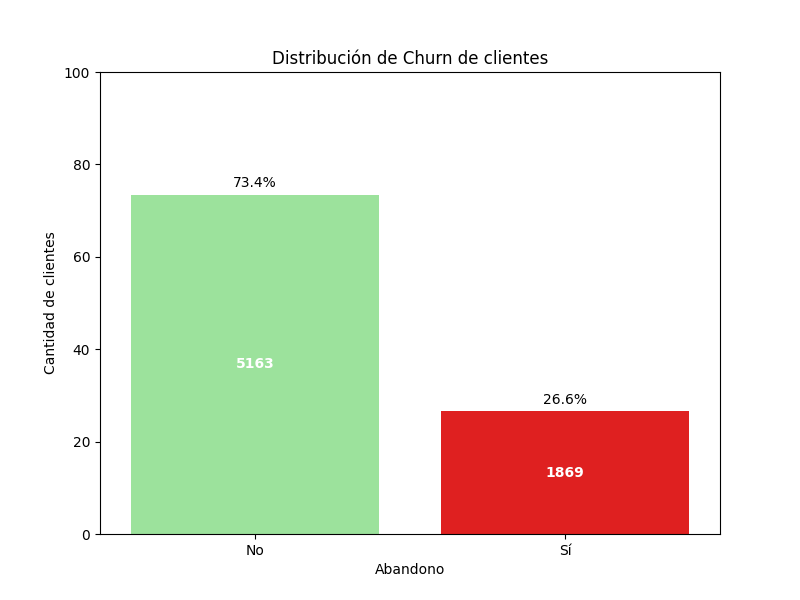

Como se observa en el gráfico de distribución de abandono de clientes, la mayoría de los clientes en nuestro dataset no han abandonado la compañía. Específicamente, el **73.4%** de los clientes permanecen, mientras que el **26.6%** han abandonado. Esta distribución subraya la necesidad de comprender los factores que llevan a este 26.6% a marcharse.

### Análisis de Variables Categóricas vs. Churn

El análisis de las variables categóricas en relación con el Churn ha revelado patrones significativos:

*   **género**: Las tasas de abandono son muy similares entre **Femenino** (27.0%) y **Masculino** (26.2%), lo que sugiere que el género no es un factor determinante en el Churn.

*   **posee_pareja**: Los clientes que **no tienen pareja** muestran una tasa de abandono significativamente mayor (33.0%) en comparación con aquellos que **sí tienen pareja** (19.7%). Esto indica que tener una pareja podría estar asociado a una mayor lealtad.

*   **posee_dependientes**: Similar al caso de la pareja, los clientes que **no tienen dependientes** tienen una tasa de Churn más alta (31.3%) que aquellos que **sí tienen dependientes** (15.5%). La presencia de dependientes parece fomentar una mayor permanencia.  
En el siguiente gráfico se observa una tasa de Churn más alto en clientes que no poseen pareja ni dependientes.
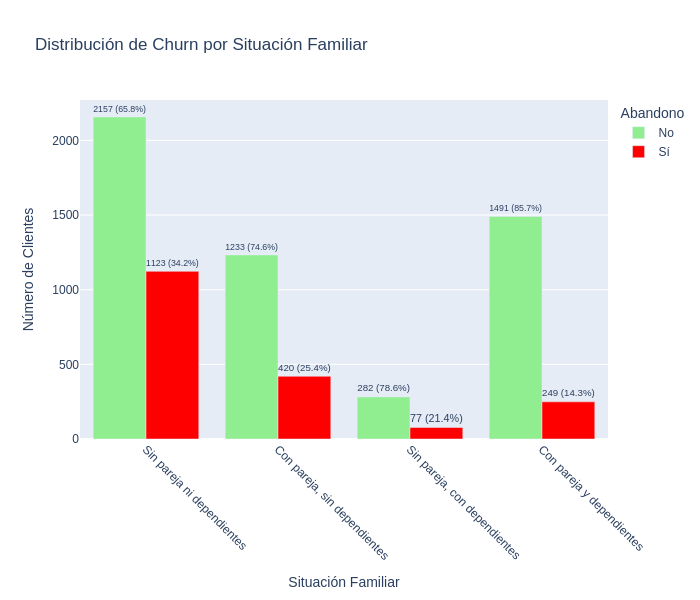
*   **servicio_telefono**: Las tasas de Churn son cercanas para clientes con (26.7%) y sin servicio de teléfono (25.0%), indicando una influencia menor de esta variable individualmente.

*   **multiples_lineas**: Los clientes con **múltiples líneas** tienen una tasa de abandono ligeramente más alta (28.6%) que aquellos con una sola línea (25.1%) o sin servicio telefónico (25.0%), lo que podría sugerir una mayor complejidad o coste del servicio.

*   **tipo_internet**: El tipo de servicio de internet es un predictor muy fuerte de Churn. Los clientes con **Fibra óptica** tienen la tasa de abandono más alta (41.9%), muy superior a los de **DSL** (19.0%) y aquellos **sin servicio de internet** (7.4%). Esto podría indicar problemas de calidad o expectativas no cumplidas con la fibra óptica. Además, es importante mencionar que los clientes que contratan Fibra óptica tienen mayor tendencia al abandono cuando los cargos o costos son mas elevados.
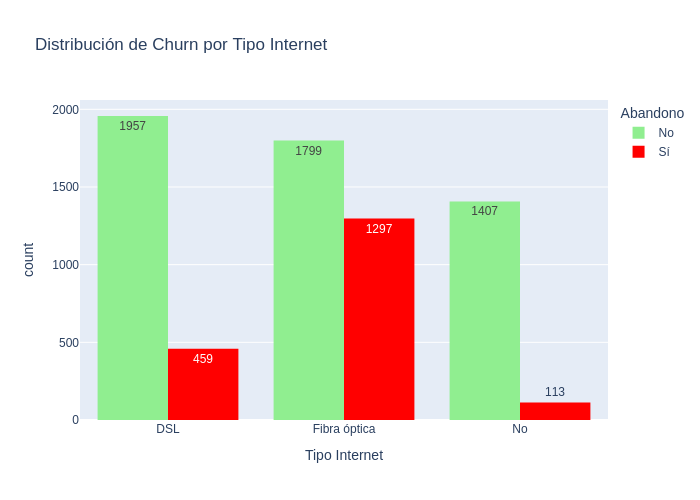

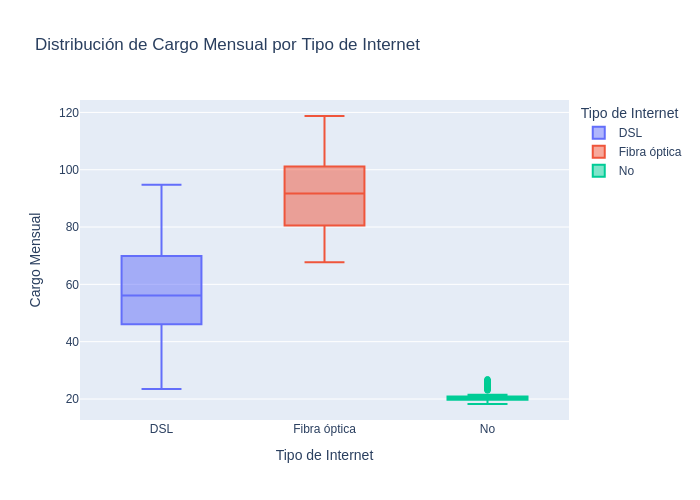
*   **seguridad_online, backup_online, proteccion_dispositivo, soporte_tecnico**: La **ausencia** de estos servicios adicionales de internet se correlaciona con tasas de Churn elevadas. Por ejemplo, los clientes **sin seguridad online** tienen un Churn del 41.8%, frente al 14.6% para quienes sí la tienen. De manera similar, los clientes **sin backup online** (39.9% Churn), **sin protección de dispositivo** (39.1% Churn) y **sin soporte técnico** (41.6% Churn) son mucho más propensos a abandonar que aquellos que cuentan con estos servicios (21.6%, 22.5% y 15.2% respectivamente). Los clientes **sin servicio de internet** en general muestran un Churn muy bajo (7.4%), lo que indica que no tener internet en absoluto es diferente a tener internet pero carecer de servicios de seguridad/soporte.

*   **streaming_tv y streaming_peliculas**: Los clientes que **no tienen** estos servicios de streaming (33.5% y 33.7% de Churn respectivamente) tienen tasas de abandono ligeramente superiores a aquellos que **sí los tienen** (30.1% y 30.0% respectivamente). Sin embargo, aquellos **sin servicio de internet** en absoluto mantienen la tasa de Churn más baja (7.4%).
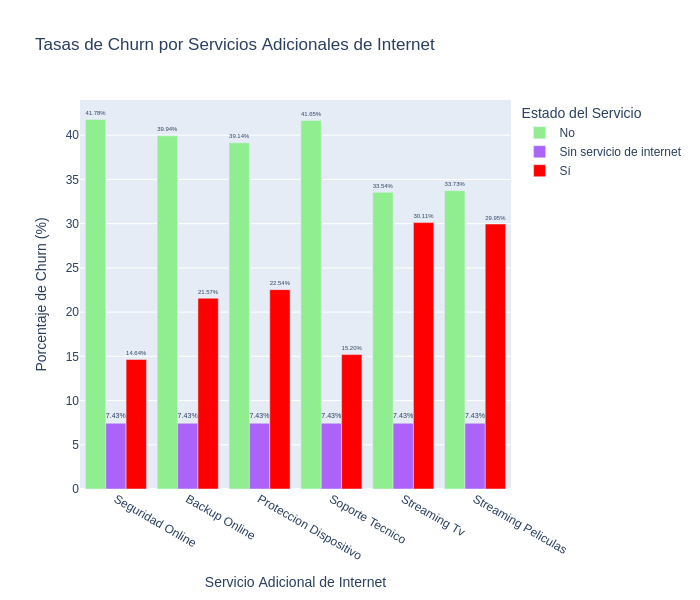

*   **tipo_contrato**: Esta es una de las variables más influyentes. Los contratos **Mensuales** presentan una alarmante tasa de Churn del **42.7%**. En contraste, los contratos **Anuales** tienen un 11.3% de Churn y los **Bienales** solo un 2.8%. Como se observa en el gráfico de distribución de Churn por tipo de contrato, la duración del contrato está directamente relacionada con la lealtad del cliente.

*   **factura_digital**: Los clientes que optan por la **factura digital (Sí)** muestran una tasa de abandono notablemente más alta (33.6%) que aquellos que prefieren la factura física (**No**, 16.4%).

*   **metodo_pago**: El **Cheque electrónico** está fuertemente asociado con el Churn, con una tasa del **45.3%**, siendo el método de pago con mayor abandono. Otros métodos como el Cheque por correo (19.2%), Tarjeta de crédito automática (15.3%) y Transferencia bancaria automática (16.7%) tienen tasas de Churn significativamente más bajas.

### Análisis de Variables Numéricas vs. Churn

El análisis de variables numéricas, visualizado a través de box plots, también revela tendencias claras:

*   **tiene +60**: Los clientes que **Sí tienen +60 años** presentan una tasa de abandono significativamente más alta (41.68%) en comparación con los clientes que **No tienen +60 años** (23.65%). Esto sugiere que la edad es un factor importante, y la visualización de su distribución en relación con el Churn se presenta en el gráfico de barras.
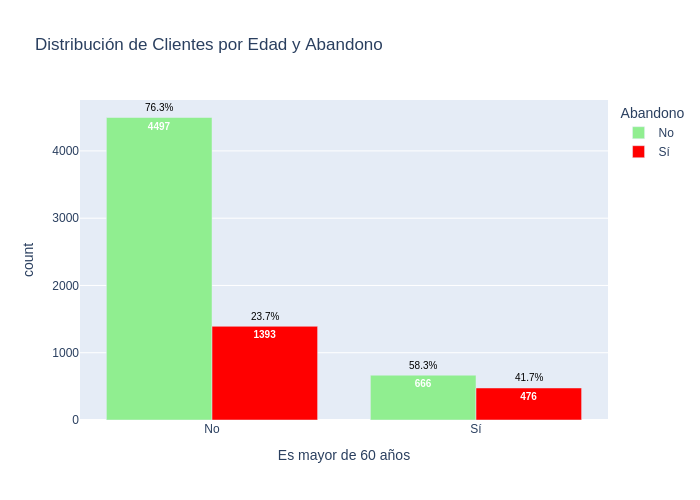

*   **tiempo_contrato**: Los box plots para `tiempo_contrato` muestran claramente que los clientes que abandonan tienen un tiempo de contrato significativamente más corto que aquellos que no. La mediana del tiempo de contrato para los clientes que se van es notablemente inferior, lo que indica que la lealtad se construye con el tiempo. Esto se corrobora con el histograma por tiempo de contrato que muestra una mayor concentración de abandonos en los primeros periodos.
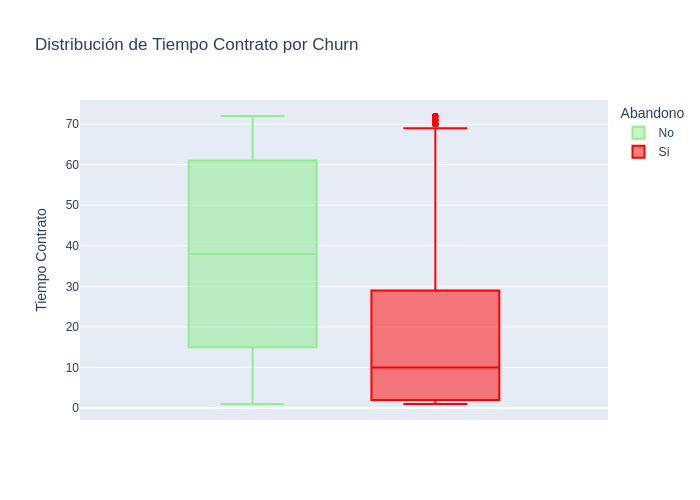
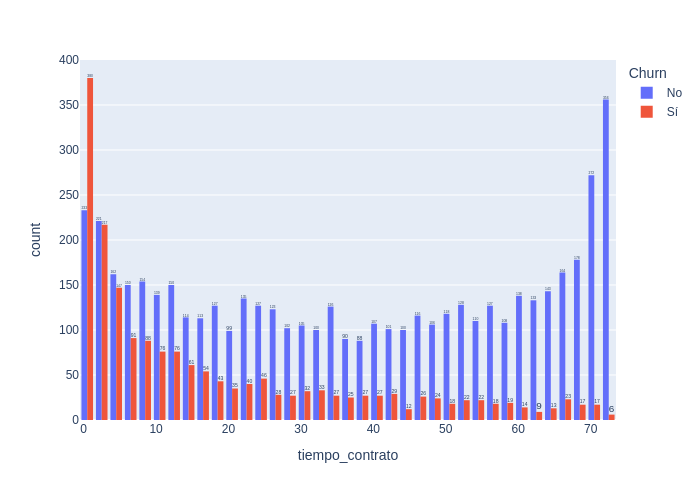

*   **cargo_mensual**: Los box plots para `cargo_mensual` (monthly charges) indican que los clientes con cargos mensuales más altos tienden a tener una mayor probabilidad de Churn. La mediana de los cargos mensuales es superior para los clientes que abandonan, lo que sugiere que el costo elevado del servicio puede ser un factor.

*   **cargo_total**: Similar a los cargos mensuales, los clientes que abandonan tienen, en promedio, cargos totales más bajos, lo cual es esperable dado su menor `tiempo_contrato`.

*   **cuentas_diarias**: Esta variable, derivada de `cargo_mensual`, muestra una distribución similar a la de `cargo_mensual`, con clientes que abandonan exhibiendo cargos diarios promedio más altos.

## Conclusiones e Insights

El análisis exhaustivo de los datos de TelecomX ha revelado patrones significativos en el comportamiento de los clientes que deciden abandonar el servicio (Churn). La identificación de estas variables influyentes es crucial para comprender la evasión y desarrollar estrategias de retención efectivas.

### Variables Categóricas Clave en el Churn:

1.  **Tipo de Contrato (`tipo_contrato`):** Se observa una correlación muy fuerte. Los clientes con contratos **Mensuales** presentan una tasa de abandono significativamente alta (42.7%), en contraste con los contratos **Anual** (11.3%) y **Bienal** (2.8%). Esto subraya la importancia de los contratos a largo plazo para la fidelización.
2.  **Método de Pago (`metodo_pago`):** El **Cheque electrónico** se asocia con la mayor tasa de Churn (45.3%). Esto podría indicar una menor lealtad o una mayor facilidad para cambiar de proveedor entre los usuarios de este método.
3.  **Tipo de Servicio de Internet (`tipo_internet`):** Los clientes de **Fibra óptica** tienen una tasa de abandono considerablemente más alta (41.9%) que los de **DSL** (19.0%) o aquellos sin servicio de internet (7.4%). Esto podría sugerir problemas con la calidad percibida del servicio de fibra, expectativas no cumplidas o que este segmento es más propenso a buscar alternativas.
4.  **Servicios Adicionales de Internet (`seguridad_online`, `backup_online`, `proteccion_dispositivo`, `soporte_tecnico`):** La **ausencia** de estos servicios de valor añadido se correlaciona con tasas de Churn más elevadas (aproximadamente 39-42%). Por el contrario, los clientes que sí contratan estos servicios tienen tasas de abandono mucho menores (aproximadamente 15-22%). Esto resalta la importancia de la oferta de paquetes completos y la percepción de seguridad y soporte.
5.  **Factura Digital (`factura_digital`):** Los clientes que reciben **factura digital (Sí)** muestran una tasa de Churn más alta (33.6%) que los que prefieren factura física (16.4%).
6.  **Situación Familiar (`posee_pareja`, `posee_dependientes`):** *Mayor tasa de abandono:* Clientes sin pareja ni dependientes. Este grupo presenta la tasa de Churn más alta, un 34.24%. Esto sugiere que las personas sin compromisos familiares (pareja o dependientes) son las más propensas a abandonar el servicio.  
*Menor tasa de abandono:* Clientes con pareja y dependientes. Este segmento es el más fiel, con una tasa de Churn significativamente baja, solo 14.31%. Parece que tener responsabilidades familiares genera una mayor lealtad o una menor disposición a cambiar de proveedor.

### Variables Numéricas Clave en el Churn:

1.  **Tiempo de Contrato (`tiempo_contrato`):** El análisis de box plots muestra claramente que los clientes con un **menor tiempo de contrato** son los más propensos a abandonar. La mediana del tiempo de contrato para los clientes que se van es notablemente inferior, lo que indica que la lealtad se construye con el tiempo. En este sentido, se destacan los clientes con contratos mensuales, donde quienes abandonan la compañía tienen un tiempo de contrato significativamente más corto en comparación con aquellos que se quedan.
2.  **Cargo Mensual (`cargo_mensual`):** Existe una tendencia donde los clientes con **cargos mensuales más altos** son más propensos a hacer Churn. Esto es coherente con el alto Churn observado en los usuarios de Fibra óptica, cuyos planes suelen ser más costosos. Un alto cargo mensual sin una percepción de valor equivalente puede ser un detonante. Particularmente, los clientes que pagan mes a mes y abandonan la compañía tienden a tener cargos mensuales más altos en comparación con los que no abandonan.
3.  **Edad (`tiene +60`):** Los clientes que **tienen +60 años** presentan una tasa de abandono significativamente más alta (41.68%) en comparación con los clientes que **No tienen +60 años** (23.65%). Al combinar este factor con el método de pago 'Cheque electrónico', se observa el riesgo más alto de Churn, alcanzando el 53.4% para este grupo etario.

### Conclusión General:

Estos hallazgos proporcionan una visión detallada de los perfiles de clientes con mayor riesgo de Churn.  
Se observa que la duración del compromiso (tipo de contrato y tiempo de contrato), la conveniencia del pago (metodo_pago), la calidad y el valor percibido de los servicios (tipo_internet y servicios adicionales), y las circunstancias personales (familiares, edad y costos), son los factores más determinantes. En general, los clientes con contratos de menor duración (especialmente mensuales) y con cargos mensuales más altos son los más propensos a abandonar el servicio (Churn). Esto se agrava si se combinan factores como el uso de Cheque Electrónico y Factura Digital, más aún para los clientes mayores de 60 años. Entender estas interrelaciones es fundamental para que TelecomX pueda diseñar intervenciones específicas y personalizadas para cada segmento de riesgo, mejorando así la retención de clientes.

### Recomendaciones Estratégicas

A continuación, se presentan sugerencias estratégicas y acciones concretas basadas en las conclusiones obtenidas del análisis para reducir la tasa de Churn y mejorar la retención de clientes:

1.  **Recomendaciones sobre Tipos de Contrato:**
    *   **Fomentar contratos a largo plazo:** Crear programas de incentivos para que los clientes opten por contratos anuales o bienales. Esto podría incluir descuentos significativos en la tarifa mensual, meses de servicio gratuitos, o la inclusión de servicios adicionales sin costo extra.
    *   **Beneficios por renovación:** Ofrecer beneficios exclusivos a los clientes que renueven sus contratos por períodos más largos, como mejoras de velocidad, acceso a contenido premium o prioridad en el soporte técnico.
    *   **Comunicación de valor:** Destacar el ahorro a largo plazo y la estabilidad que ofrecen los contratos de mayor duración en comparación con la flexibilidad, pero mayor costo, de los contratos mensuales.

2.  **Recomendaciones sobre Métodos de Pago:**
    *   **Migración a métodos automáticos:** Lanzar campañas dirigidas a clientes que utilizan 'Cheque electrónico' para incentivar la migración a la 'Transferencia bancaria (automática)' o 'Tarjeta de crédito (automática)'.
    *   **Incentivos por cambio de método:** Ofrecer pequeños descuentos en la primera factura, puntos de lealtad o sorteos para aquellos que cambien su método de pago a uno automático.
    *   **Comunicación clara:** Enfatizar la comodidad, seguridad y la reducción de olvidos de pago que ofrecen los métodos automáticos.
    *   **Investigación y mejora de factura digital:** Realizar encuestas a clientes que abandonaron y utilizaban 'factura_digital', 'cheque electrónico' para entender las razones. Optimizar el diseño y claridad de la factura digital, haciéndola más intuitiva y transparente.
    *   **Atención al segmento de mayor riesgo (Cheque Electrónico y Factura Digital):** Implementar campañas de retención específicas y comunicación personalizada para los clientes que utilizan 'Cheque electrónico' y 'factura_digital', dado su alto riesgo de Churn.

3.  **Recomendaciones sobre Servicios de Internet (Fibra óptica y Adicionales):**
    *   **Investigación de Fibra óptica:** Realizar encuestas de satisfacción específicas y análisis de quejas para clientes de 'Fibra óptica' para identificar problemas de calidad de servicio, expectativas no cumplidas o falta de comprensión de sus beneficios. Mejorar proactivamente los puntos débiles detectados.
    *   **Promoción de servicios adicionales:** Integrar la promoción de servicios como 'seguridad_online', 'backup_online', 'proteccion_dispositivo' y 'soporte_tecnico' en la oferta inicial. Podría considerarse ofrecer un período de prueba gratuito o incluirlos en paquetes de mayor valor percibido.
    *   **Paquetes integrados:** Crear paquetes de servicios que incluyan estos adicionales de forma predeterminada, comunicando claramente el valor y la tranquilidad que aportan.

4.  **Recomendaciones sobre Gestión de Costos y Ofertas:**
    *   **Revisión de estructura de cargos:** Analizar la estructura de 'cargo_mensual' para clientes de 'Fibra óptica' y aquellos con bajo 'tiempo_contrato'. Buscar oportunidades para crear ofertas personalizadas que equilibren el valor y el costo.
    *   **Ofertas personalizadas:** Desarrollar modelos predictivos para identificar clientes de alto riesgo de Churn y ofrecerles descuentos temporales, mejoras de servicio gratuitas o la inclusión de un servicio adicional que sea relevante para sus hábitos de consumo. Prestar especial atención a los clientes con contratos mensuales y cargos mensuales altos, para asegurar que perciben un valor adecuado.
    *   **Valor percibido:** Enfocarse en comunicar el valor real de los servicios y no solo el precio, destacando beneficios y exclusividades.

5.  **Recomendaciones para Clientes con Poco Tiempo de Contrato (Tenure):**
    *   **Programa de bienvenida:** Implementar un programa de bienvenida robusto que incluya llamadas de seguimiento proactivas en los primeros 3-6 meses para asegurar la satisfacción y resolver dudas o problemas iniciales.
    *   **Soporte proactivo:** Ofrecer soporte técnico al cliente proactivo, anticipándose a posibles problemas y ofreciendo soluciones antes de que se conviertan en quejas.
    *   **Incentivos por permanencia inicial:** Pequeños beneficios o descuentos después de los primeros 6 meses de permanencia para reforzar la decisión del cliente y fomentar la lealtad.

6.  **Recomendaciones para el Segmento de Clientes Mayores de 60 años con Cheque Electrónico:**
    *   **Atención al cliente personalizada:** Desarrollar programas de retención específicos para este grupo de alto riesgo (Cheque Electrónico y +60 años), que podrían incluir atención al cliente dedicada, opciones de pago simplificadas o planes de servicio adaptados a sus necesidades.
    *   **Comunicación de beneficios:** Enfatizar los beneficios de los métodos de pago automáticos para este segmento, destacando la comodidad y la seguridad.

7.  **Recomendaciones sobre Situación Familiar:**
    *   **Segmentación y personalización:** Utilizar la información sobre 'posee_pareja' y 'posee_dependientes' para segmentar la base de clientes y personalizar las ofertas y la comunicación.
    *   **Paquetes flexibles:** Para clientes 'sin pareja' y 'sin dependientes', que tienden a un mayor Churn, ofrecer paquetes más flexibles o con servicios adaptados a necesidades individuales (como menor cantidad de líneas, servicios de entretenimiento personalizados, planes de datos móviles individuales).
    *   **Marketing dirigido:** Diseñar campañas de marketing que resuenen con los intereses y el estilo de vida de estos segmentos, destacando beneficios relevantes para ellos.